In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv("../data/cleaned/imdb_data_cleaned.csv", sep=";")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4865 entries, 0 to 4864
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             4865 non-null   int64  
 1   place            4865 non-null   int64  
 2   title            4865 non-null   object 
 3   rating           4865 non-null   float64
 4   duration         4865 non-null   int64  
 5   director         4865 non-null   object 
 6   genre            4865 non-null   object 
 7   release_date     4865 non-null   object 
 8   origin_country   4865 non-null   object 
 9   company          4865 non-null   object 
 10  budget           4130 non-null   float64
 11  gross_us         4660 non-null   float64
 12  gross_world      4696 non-null   float64
 13  open_week        4346 non-null   float64
 14  release_month    4865 non-null   int64  
 15  genre_base       4865 non-null   object 
 16  has_budget       4865 non-null   bool   
 17  has_gross_us  

In [73]:
df['ROI'] = ((df['gross_world'] - df['budget']) / df['budget']) * 100

# Cвязь бюджета и мировых сборов
На графике ось Х - бюджет, ось У - мировые сборы. Красная линия это линия "окупаемости", собрали больше чем потратили.
Мы видим что в среднем чем больше бюджет тем больше мировые сборы.

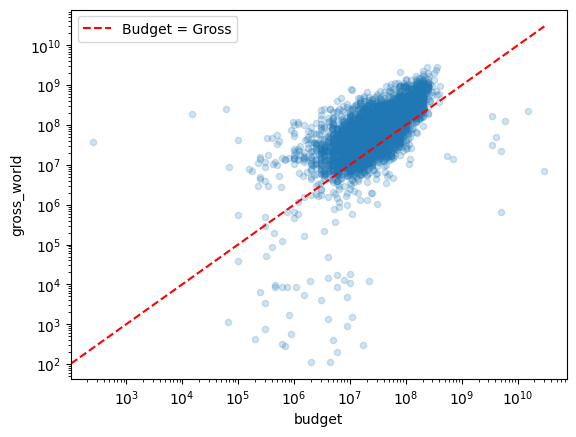

In [74]:
# 2.1
tf = df[(df["has_budget"]) & df["has_gross_world"]]
ax = tf.plot(x="budget",y="gross_world", logx=True, logy=True, alpha=0.2, kind="scatter")
# Линия окупаемости, не знаю если нужна, раз мы рассматриваем топ фильмов
maxMoney = max(tf['budget'].max(), tf['gross_world'].max())
ax.plot([0, maxMoney], [0, maxMoney], color="red", linestyle="--", label="Budget = Gross")
ax.legend()
plt.show()

plt.show()

# Cвязь бюджета и возврата на инвестиции
По графику ниже видно что есть небольшая тенденция более бюджетным фильмам окупаться на бОльший процент чем большИм. Но большинство фильмов имеет возврат инвестиций ниже 500%

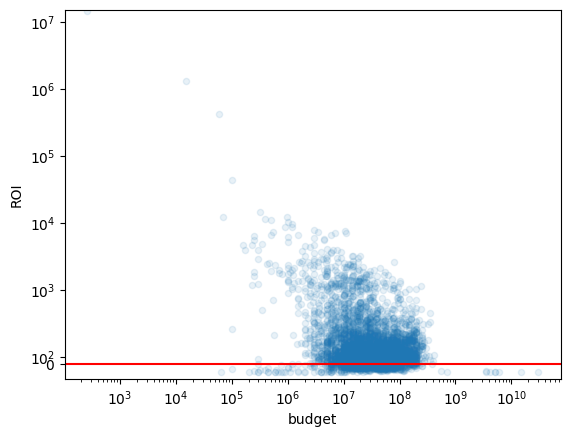

In [95]:
# Scatterplot budget vs ROI
tfForScatter = tf#[(tf['ROI'] >= tf_q1 - 4.5*tf_iqr) & (tf['ROI'] <= tf_q3 + 4.5*tf_iqr)]
tfForScatter.plot(x="budget", y="ROI", logx=True, alpha=0.10, kind="scatter")

plt.axhline(0, color="red")
plt.yscale('symlog', linthresh=1000)
plt.ylim(bottom=-200)
# Зум
# plt.ylim(top=1000)
# plt.xlim(left=10**5)
# plt.xlim(right=10**9)
plt.show()

# Топ 20 фильмов по окупаемости
Видно что в топах по окупаемости много хорроров. "Ведьма из Блэр" и "Паранормальные явления" явные мега-хиты собрашвшие сотни миллионов долларов сборов при минимальном бюджете.

In [102]:
#2.2-2.3
topRoi = df.sort_values(by="ROI", ascending=False).reset_index()
#top 20 roi
view = topRoi[['title', 'budget', 'gross_world', 'ROI', "rating", "genre_base"]].head(20)
view.style.format({
    'budget': '${:,.0f}',     
    'gross_world': '${:,.0f}',
    'ROI': '{:,.1f}%',
    'rating': '{:,.1f}'
})

,title,budget,gross_world,ROI,rating,genre_base
0,Sarileru Neekevvaru,$260,"$37,389,889","14,380,626.5%",5.8,"['comedy', 'drama', 'action']"
1,Paranormal Activity,"$15,000","$193,355,933","1,288,939.6%",6.3,['horror']
2,The Blair Witch Project,"$60,000","$248,639,881","414,299.8%",6.5,['horror']
3,The Gallows,"$100,000","$42,964,410","42,864.4%",4.3,"['horror', 'thriller']"
4,Halloween,"$325,000","$47,175,973","14,415.7%",7.7,"['horror', 'thriller']"
5,Good Boy,"$70,000","$8,676,112","12,294.4%",6.2,"['horror', 'thriller']"
6,Rocky,"$960,000","$117,253,345","12,113.9%",8.1,['drama']
7,Napoleon Dynamite,"$400,000","$46,141,106","11,435.3%",7.0,['comedy']
8,Open Water,"$500,000","$54,683,487","10,836.7%",5.8,"['drama', 'horror', 'thriller', 'adventure']"
9,The Devil Inside,"$1,000,000","$101,758,490","10,075.8%",4.2,['horror']


# Анализ бюджета по странам
Взяв 10 стран где само много фильмов в нашем датасете мы можем посмотреть на средний возврат инвестиций фильмов. По графикам видно, что в США и не самая большая медиана, но очень много выбросов собравших большой возврат инвестиций, "хитов".

C:\Users\Artem Shumay\AppData\Local\Temp\ipykernel_29476\662456945.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='origin_country', y='ROI', palette="Set3", data=tfForBoxplot)


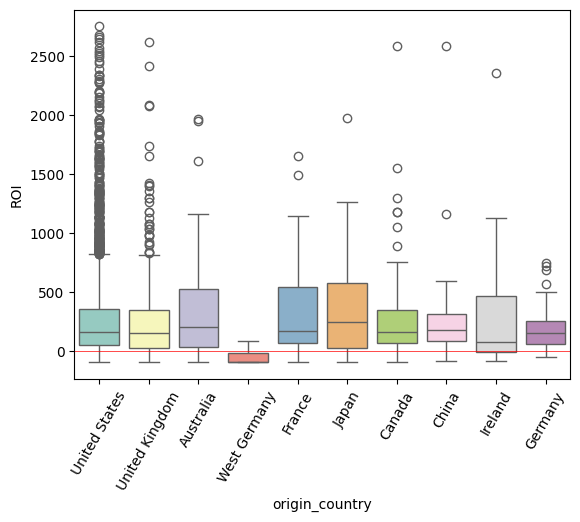

C:\Users\Artem Shumay\AppData\Local\Temp\ipykernel_29476\662456945.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='origin_country', y='ROI', palette="Set3", data=tfForBoxplot2)


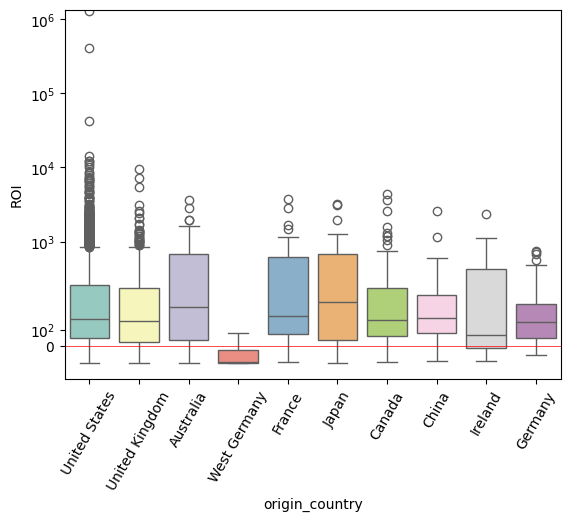

C:\Users\Artem Shumay\AppData\Local\Temp\ipykernel_29476\662456945.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=tfForBoxplot, x='origin_country', y='ROI', palette="Set1", jitter=0.15, alpha=0.5)


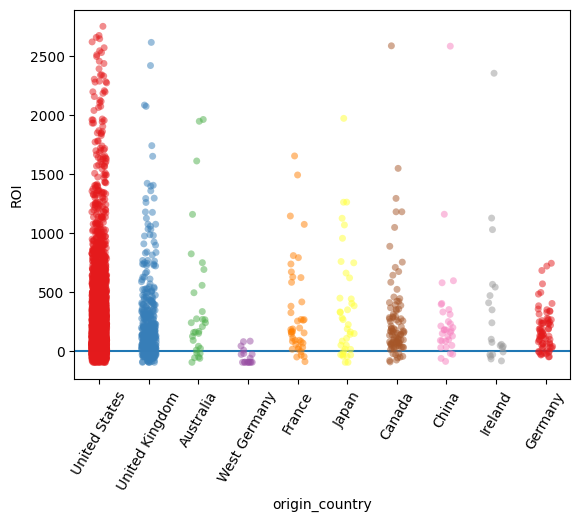

In [99]:
tf = df[(df["has_budget"]) & df["has_gross_world"]]
# фильмов с бюджетом < 10,000 всего один, если мы не уберем его в очистке позже
# print(tf[tf["budget"]<10000].count())

tf_q1 = tf['ROI'].quantile(0.25)
tf_q3 = tf['ROI'].quantile(0.75)
tf_iqr = tf_q3 - tf_q1

# Для читабельности оставим только страны где само много фильмов
bestCountries = tf['origin_country'].value_counts().head(10).index
tfBestCountries = tf[tf['origin_country'].isin(bestCountries)]

# Уберем выбросы методом iqr для читабельности графика, использовал 7.5iqr чтобы оставить как можно больше "хитов"
tbc_q1 = tfBestCountries['ROI'].quantile(0.25)
tbc_q3 = tfBestCountries['ROI'].quantile(0.75)
tbc_iqr = tbc_q3 - tbc_q1
tfForBoxplot = tfBestCountries[(tfBestCountries['ROI'] >= tbc_q1 - 7.5*tbc_iqr) & (tfBestCountries['ROI'] <= tbc_q3 + 7.5*tbc_iqr)]

#boxorder = tfForBoxplot.groupby("origin_country")["ROI"].median().sort_values(ascending=False).index

# Построим график boxplot очистив выбросы с помощью 7.5 iqr
sns.boxplot(x='origin_country', y='ROI', palette="Set3", data=tfForBoxplot)
plt.xticks(rotation=60)
plt.axhline(0, color="red", linewidth=0.5)
plt.show()

# Построим график boxplot с выбросами и симлог скейлом
tfForBoxplot2 = tfBestCountries
sns.boxplot(x='origin_country', y='ROI', palette="Set3", data=tfForBoxplot2)
plt.xticks(rotation=60)
plt.axhline(0, color="red", linewidth=0.5)
plt.yscale('symlog', linthresh=500)
plt.ylim(bottom=-200)
plt.show()

# Построим график stripplot
sns.stripplot(data=tfForBoxplot, x='origin_country', y='ROI', palette="Set1", jitter=0.15, alpha=0.5)

plt.xticks(rotation=60)
# Линия не потери денег
plt.axhline(0)

plt.show()

# Возврат инвестиций по жанрам
По графику видно что хорроры неоспариваемый победитель в возврате инвестиций. Интересно заметить что хоть медианный бюджет анимаций в 5 раз больше чем у хорроров они все равно стоят на втором месте по медианном возврате инвестиций.

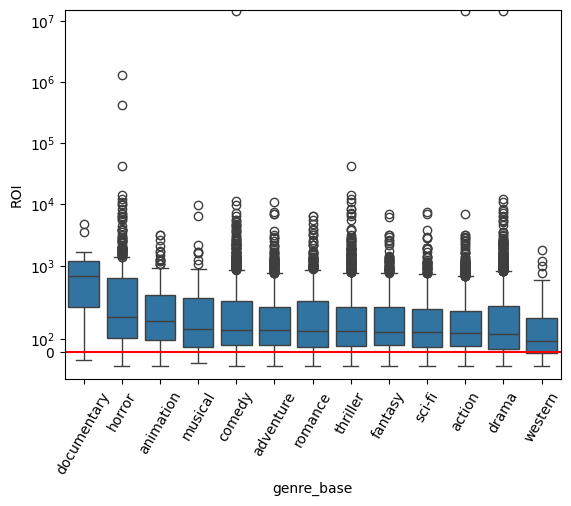

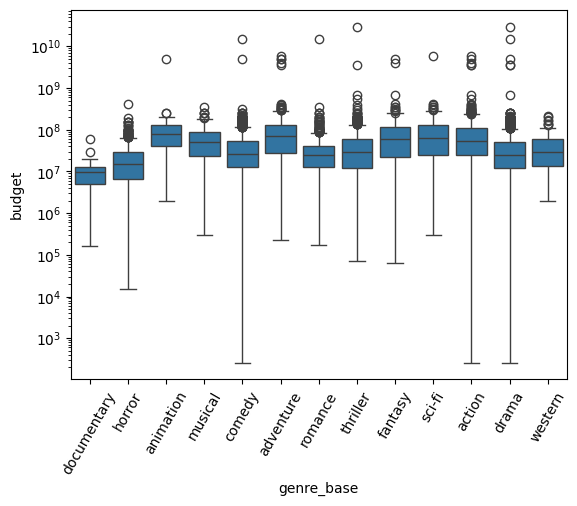

animation median budget 80000000.0 vs horror median budget 15000000.0


In [116]:
import ast
tf = df[(df["has_budget"]) & df["has_gross_world"]].copy()
# Превратим список жанров из строки в список
tf['genre_base'] = tf['genre_base'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

#Использую симлог вместо убирания выбросов #уберем выбросы 6 iqr чтобы оставить как можно больше хитов
tfForBoxplot = tf # [(tf['ROI'] >= tf_q1 - 6*tf_iqr) & (tfBestCountries['ROI'] <= tf_q3 + 6*tf_iqr)]

# чтобы жанр учавствовал во всех своих подсчетах разделим genre base на несколько строк: по строке на жанр
tf_exploded = tfForBoxplot.explode("genre_base").reset_index()
#print(tf_exploded.shape, tf.shape)
#print(tf_exploded.head(5))

# Отсортируем по медианам
roi_genres = tf_exploded.groupby('genre_base')['ROI'].median().sort_values(ascending=False)

sns.boxplot(data=tf_exploded, x="genre_base", y="ROI", order=roi_genres.index)
plt.xticks(rotation=60)
plt.axhline(0, color="red")
plt.yscale('symlog', linthresh=500)
plt.ylim(bottom=-200)
plt.show()

budget_genres = tf_exploded.groupby('genre_base')['budget'].median().sort_values(ascending=False)
sns.boxplot(data=tf_exploded, x="genre_base", y="budget", order=roi_genres.index)
plt.xticks(rotation=60)
plt.yscale("log")
plt.show()

print(f"animation median budget {budget_genres['animation']} vs horror median budget {budget_genres['horror']}")

# Рейтинг по жанрам
Медианный рейтинг драм самый большой, на втором месте - анимации. Ниже приведена быстрая сводка по медианным значениям.
- Драмы: низкий возврат инвестиций, большой рейтинг, средний бюджет на более низкой стороне
- Хорроры: высокий возврат инвестций, низкий рейтинг, низкий бюджет
- Анимационные фильмы: высокий возврат инвестиций, высокий рейтинг, высокий бюджет.

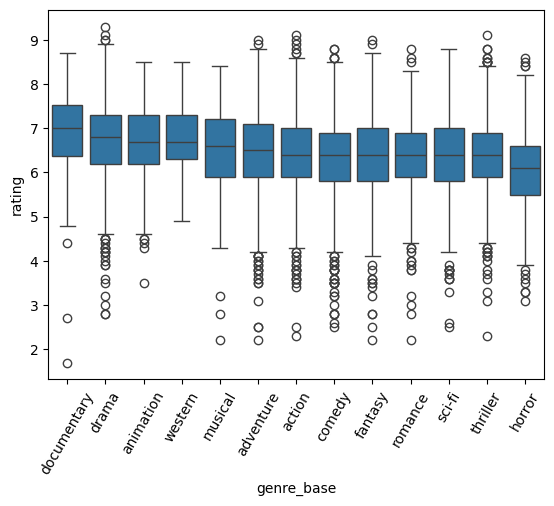

In [79]:
#4
tf_exploded = tf.explode("genre_base").reset_index()

rating_genres = tf_exploded.groupby('genre_base')['rating'].median().sort_values(ascending=False)

# Рейтинг по жанрам
sns.boxplot(data=tf_exploded, x="genre_base", y="rating", order=rating_genres.index)
plt.xticks(rotation=60)
plt.show()

# Медианные значения разных статистик по жанрам

In [119]:
genreStats = tf_exploded.groupby('genre_base').agg({
    'ROI': 'median',
    'rating': 'median',
    'budget': 'median'
})

view = genreStats.sort_values(["ROI", "rating", "budget"], ascending=False).reset_index()[['genre_base', 'ROI', 'rating', 'budget']]
view.style.format({
    'budget': '${:,.0f}',
    'ROI': '{:,.1f}%',
    'rating': '{:,.1f}'
})

# Всего 20 документалок, надо их возможно почистить
#tf_exploded[tf_exploded["genre_base"]=="documentary"].count()

,genre_base,ROI,rating,budget
0,documentary,683.7%,7.0,"$9,500,000"
1,horror,255.0%,6.1,"$15,000,000"
2,animation,230.1%,6.7,"$80,000,000"
3,musical,172.0%,6.6,"$50,000,000"
4,comedy,166.3%,6.4,"$26,000,000"
5,adventure,165.6%,6.5,"$70,000,000"
6,romance,154.5%,6.4,"$25,000,000"
7,thriller,153.1%,6.4,"$30,000,000"
8,fantasy,150.0%,6.4,"$60,000,000"
9,sci-fi,148.9%,6.4,"$65,000,000"


# Наглядный график возврата инвестиций и рейтинга от жанров

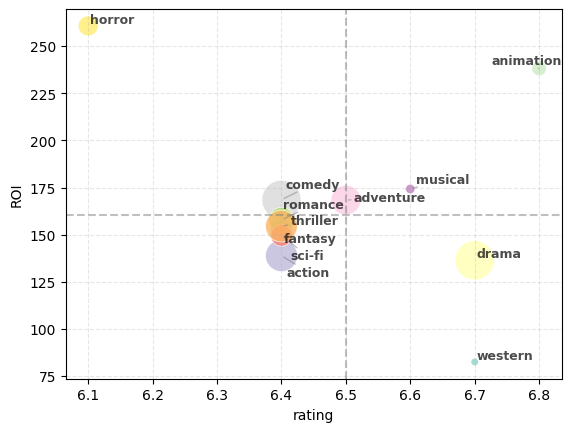

In [87]:
from adjustText import adjust_text

genreStats = tf_exploded.rename(columns={'budget': 'count'}).groupby('genre_base').agg({
    'ROI': 'median',
    'rating': 'median',
    'count': 'count'
})

# берем только статистику где достаточное количество фильмов чтобы ее составить
count_thresh = 50
genreStats = genreStats[genreStats["count"] > count_thresh]

sns.scatterplot(
    data=genreStats,
    x='rating',
    y='ROI',
    size='count',
    sizes=(30, 800),
    hue="ROI",
    palette="Set3",
    alpha=0.8,
    legend=False
)

texts = []
i = 0
for genre in genreStats.index:
    x = genreStats.loc[genre, 'rating']
    y = genreStats.loc[genre, 'ROI']
    texts.append(plt.text(x, y, genre, fontsize=9, fontweight='bold', alpha=0.7))
    i += 1
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', alpha=0.5))

# Линии-разделители (средние по рынку)
avg_rating = tf_exploded['rating'].median()
avg_roi = tf_exploded['ROI'].median()

plt.axvline(avg_rating, color='gray', linestyle='--', alpha=0.5, label=f'Median Rating ({avg_rating})')
plt.axhline(avg_roi, color='gray', linestyle='--', alpha=0.5, label=f'Median ROI ({avg_roi:.1f}%)')
plt.grid(True, linestyle='--', alpha=0.3)

plt.show()

# Фильмы провалившиеся в прокате но занявшие места в сердце зрителей
Далее идет список топ 10% фильмов по рейтингу у которых негативный возврат инвестиций. Можно заметить хоть у анимаций хороший медианный возврат инвестиций в этом списке в топе именно анимации с большими бюджетами.

In [82]:
# 3
# Quantile 0.9 rating, negative ROI
rating_thresh = df["rating"].quantile(0.9)
goodRatedFlops = df[(df["ROI"] < 0) & (df["rating"] > rating_thresh)]
goodRatedFlops = goodRatedFlops.sort_values("rating", ascending=False).reset_index()
view = goodRatedFlops[['title', 'budget', 'ROI', "rating"]]
view.style.format({
    'budget': '${:,.0f}',
    'ROI': '{:,.1f}%',
    'rating': '{:,.1f}'
})
# Топ 10% фильмов по рейтингу которые не окупились

,title,budget,ROI,rating
0,Life Is Beautiful,"$15,000,000,000",-98.5%,8.6
1,The Legend of Maula Jatt,"$700,000,000",-98.0%,8.4
2,Das Boot,"$32,000,000",-64.1%,8.4
3,Dersu Uzala,"$4,000,000",-99.6%,8.2
4,Barry Lyndon,"$11,000,000",-94.8%,8.1
5,The Iron Giant,"$70,000,000",-66.7%,8.1
6,Soul,"$150,000,000",-18.7%,8.0
7,Stalker,"$1,000,000",-54.4%,8.0
8,Children of Men,"$76,000,000",-7.1%,7.9
9,Almost Famous,"$60,000,000",-21.0%,7.9


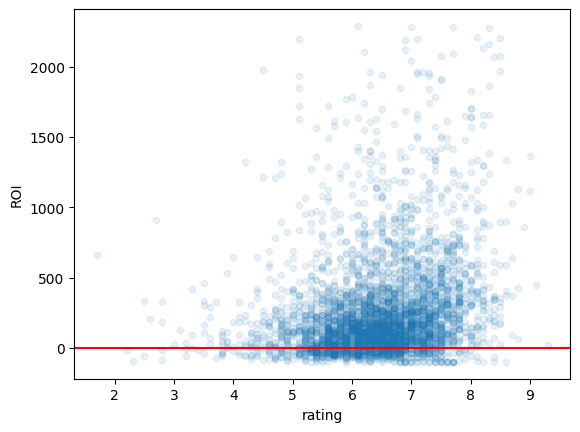

In [83]:
# Scatterplot budget vs ROI
tfForScatter = tf[(tf['ROI'] >= tf_q1 - 6*tf_iqr) & (tf['ROI'] <= tf_q3 + 6*tf_iqr)]
tfForScatter.plot(x="rating", y="ROI", logx=False, alpha=0.1, kind="scatter")
plt.axhline(0, color="red")
plt.show()

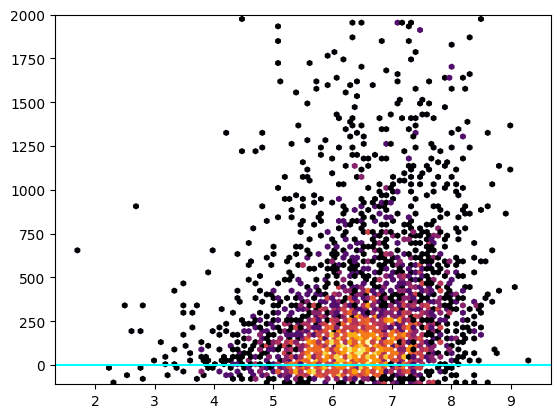

In [84]:
#тоже самое что выше но более красиво? Не то чтобы более наглядно
plt.hexbin(
    tfForScatter['rating'], 
    tfForScatter['ROI'], 
    cmap='inferno', 
    mincnt=1,
    bins='log' 
)
plt.ylim(-110, 2000) 
plt.axhline(0, color='cyan')
plt.show()

# Но есть ли тренд между рейтингом и сборами?
По графику ниже, где красным идет линия тренда можно явно увидеть что более высокие рейтинги, как правило, имеют более большой возврат инвестиций. Что конечно не отрицает существование фильмов с хорошими рейтингами но негативными возвратами инвестиций

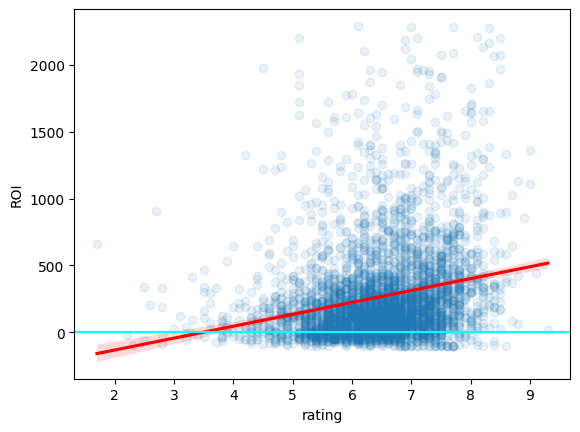

In [85]:
#Тоже самое что выше но линия тренда с помощью СНС, не знаю можно ли ее использовать ведь мы сами не считали тренд, зато наглядно
sns.regplot(
    data=tfForScatter, 
    x="rating", 
    y="ROI", 
    scatter_kws={'alpha': 0.1}, 
    line_kws={'color': 'red'}
)
plt.axhline(0, color="cyan")
plt.show()

# Жанры по странам. Что где снимают
По графику ниже видно что в Японии анимации в процентном соотношении снимают чаще чем в других странах. В США само часто снимают драмы и комедии.
А из Франции выходит много триллеров.

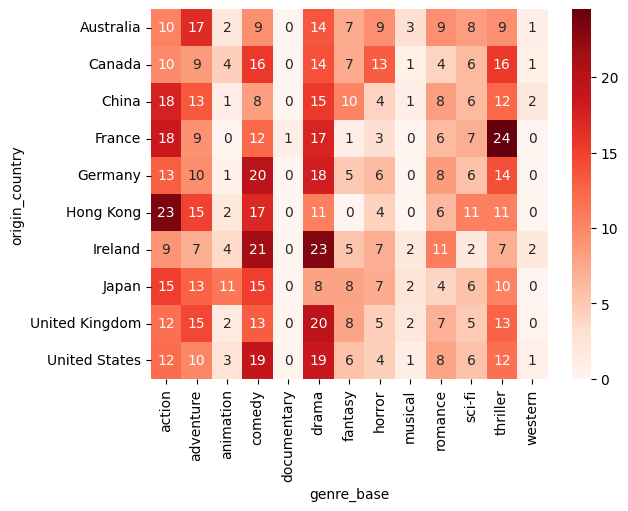

In [86]:
tf_exploded = tf.explode("genre_base")
# Для читабельности оставим только страны где само много фильмов
bestCountries = tf_exploded['origin_country'].value_counts().head(10).index
tf_exploded = tf_exploded[tf_exploded['origin_country'].isin(bestCountries)]

# Видно проблему, у нас выборка почти полностью из США, посчитаю процентно
# pt = pd.crosstab(tf_exploded['origin_country'], tf_exploded['genre_base'])
# sns.heatmap(
#     pt, 
#     annot=True,
#     fmt='d',
# )

pt_normalized = pd.crosstab(
    tf_exploded['origin_country'], 
    tf_exploded['genre_base'], 
    normalize='index'
)

sns.heatmap(
    pt_normalized * 100, 
    annot=True, 
    fmt='.0f',
    cmap='Reds',
)

plt.show()

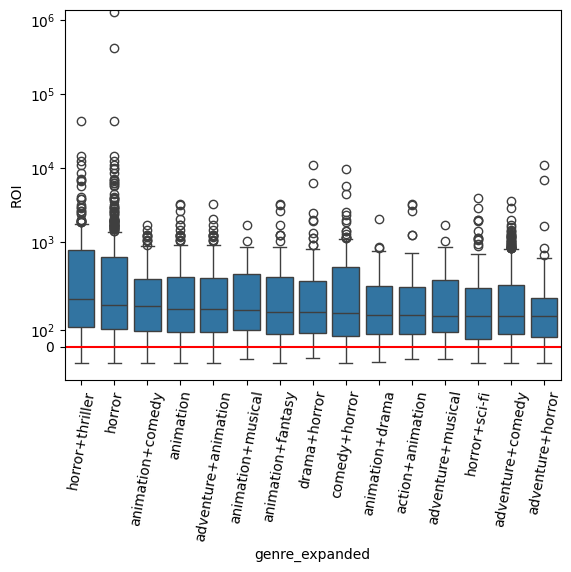

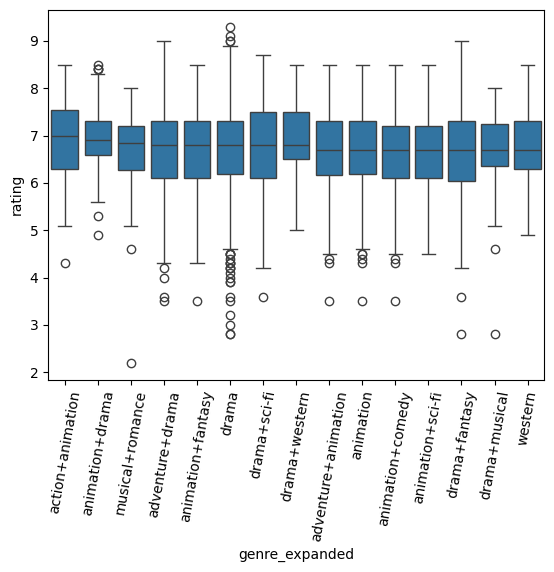

In [88]:
base_genres = ['comedy','musical', 'drama', 'horror', 
               'action', 'romance', 'sci-fi', 'thriller', 
               'documentary','adventure', 'animation', 'fantasy', 
               'western']


def add_genre_combo(x):
    x.sort()
    new_list = []
    for g1 in x:
        for g2 in x:
            if (g1 != g2 and f"{g2}+{g1}" not in new_list):
                new_list.append(f"{g1}+{g2}")
    new_list += x
    return new_list

tf["genre_expanded"] = tf["genre_base"].apply(add_genre_combo)

tf_exploded = tf.explode("genre_expanded").reset_index()

# Возьмем только те где достаточное количество жанров
count_thresh = 30
genreComboCount = tf_exploded["genre_expanded"].value_counts()
genreComboCount = genreComboCount[genreComboCount > count_thresh]
tf_exploded = tf_exploded[tf_exploded["genre_expanded"].isin(genreComboCount.index)]

#Возьмем 15 лучших комбинаций и жанров по РОИ
num_genres = 15
tf_exploded_best_roi = tf_exploded.groupby('genre_expanded')["ROI"].median().sort_values(ascending=False).head(num_genres).index

exploded_roi = tf_exploded[tf_exploded["genre_expanded"].isin(tf_exploded_best_roi)]

# Отсортируем по медианам
roi_genres = exploded_roi.groupby('genre_expanded')['ROI'].median().sort_values(ascending=False)

sns.boxplot(data=exploded_roi, x="genre_expanded", y="ROI", order=roi_genres.index)
plt.xticks(rotation=80)
plt.axhline(0, color="red")
plt.yscale('symlog', linthresh=500)
plt.ylim(bottom=-200)
plt.show()

#Возьмем 15 лучших комбинаций и жанров по рейтингу
num_genres = 15
tf_exploded_best_genre = tf_exploded.groupby('genre_expanded')["rating"].median().sort_values(ascending=False).head(num_genres).index

exploded_rating = tf_exploded[tf_exploded["genre_expanded"].isin(tf_exploded_best_genre)]

rating_genres = exploded_rating.groupby('genre_expanded')['rating'].median().sort_values(ascending=False)

# Рейтинг по жанрам
sns.boxplot(data=tf_exploded, x="genre_expanded", y="rating", order=rating_genres.index)
plt.xticks(rotation=80)
plt.show()